In [1]:
using Plots
using Random
using Distributions

In [2]:
function Binomiali(N,p,nn) ### Numero de pruebas ##nn= numero de intentos
    options = [1, 0]
    probabilities = [p,1-p]  # Adjust the probabilities as needed
    
    # Create a random sample of indices using the probabilities
    sampled_indices = rand(Categorical(probabilities),nn,N)
    
    # Map the sampled indices to the options array
    dn = options[sampled_indices]
    
    n=zeros(nn,N)
    for i in 1:N
        n[:,i]=sum(dn[:,1:i],dims=2)
    end
    return n
end

Binomiali (generic function with 1 method)

In [3]:
N=20
p=0.9
n=Binomiali(N,p,1000);

1000×20 Matrix{Float64}:
 1.0  1.0  2.0  3.0  4.0  5.0  6.0  …  14.0  15.0  16.0  17.0  18.0  19.0
 1.0  2.0  3.0  4.0  5.0  6.0  7.0     14.0  15.0  16.0  16.0  16.0  17.0
 1.0  2.0  3.0  4.0  5.0  6.0  7.0     14.0  15.0  16.0  17.0  18.0  19.0
 1.0  1.0  2.0  3.0  4.0  5.0  6.0     13.0  14.0  15.0  15.0  15.0  16.0
 1.0  2.0  3.0  4.0  5.0  6.0  7.0     15.0  16.0  16.0  17.0  18.0  19.0
 1.0  2.0  3.0  4.0  5.0  6.0  7.0  …  15.0  16.0  17.0  18.0  19.0  20.0
 1.0  2.0  3.0  4.0  5.0  6.0  7.0     15.0  15.0  16.0  17.0  18.0  19.0
 1.0  2.0  2.0  3.0  4.0  5.0  6.0     12.0  12.0  13.0  14.0  15.0  16.0
 1.0  2.0  3.0  4.0  5.0  6.0  7.0     15.0  16.0  17.0  18.0  19.0  20.0
 1.0  2.0  3.0  4.0  5.0  6.0  7.0     14.0  15.0  16.0  17.0  18.0  19.0
 1.0  2.0  3.0  4.0  4.0  5.0  6.0  …  13.0  14.0  15.0  16.0  17.0  17.0
 0.0  0.0  1.0  2.0  3.0  4.0  5.0     13.0  14.0  15.0  15.0  15.0  16.0
 1.0  2.0  3.0  4.0  5.0  6.0  7.0     15.0  16.0  17.0  18.0  19.0  20.0
 ⋮           

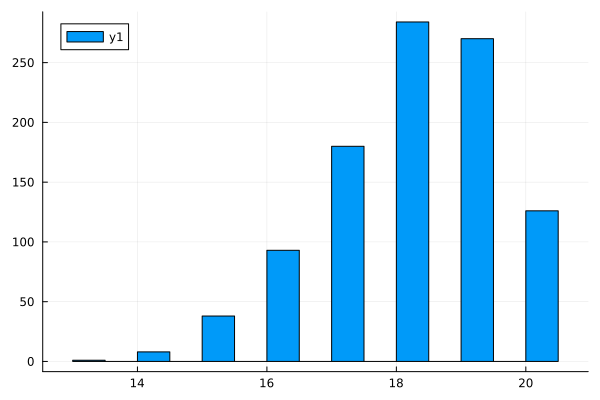

In [4]:
histogram(n[:,end])

# Modelo SIR Estocastico binomial

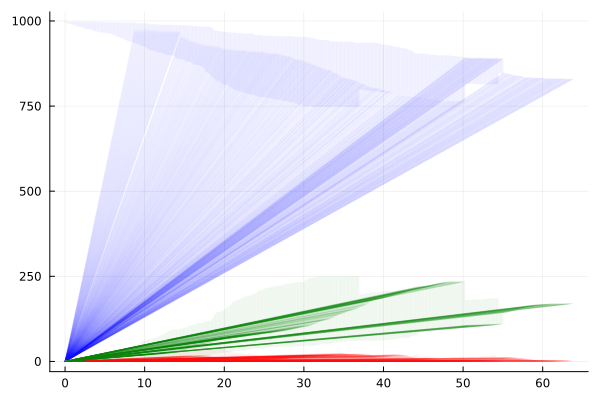

In [207]:
tf=100

S,I,R,ts,tps=SIReb(997,3,100,1/2,1/2,1000,100);
plot(ts,S,color="blue",label="",alpha=0.05)
plot!(ts,I,color="red",label="",alpha=0.05)
plot!(ts,R,color="green",label="",alpha=0.05)

In [208]:

tf=100

S,I,R,ts,tps=SIReb(990,10,100,1/20,1/2,1000,100);
plot(ts,S,color="blue",label="",alpha=0.05)
plot!(ts,I,color="red",label="",alpha=0.05)
plot!(ts,R,color="green",label="",alpha=0.05)

In [209]:
S,I,R,ts,tps=SIReb(998,1,100,0.1,0.2,1000,100);
plot(ts,S,color="blue",label="",alpha=0.05)
plot!(ts,I,color="red",label="",alpha=0.05)
plot!(ts,R,color="green",label="",alpha=0.05)

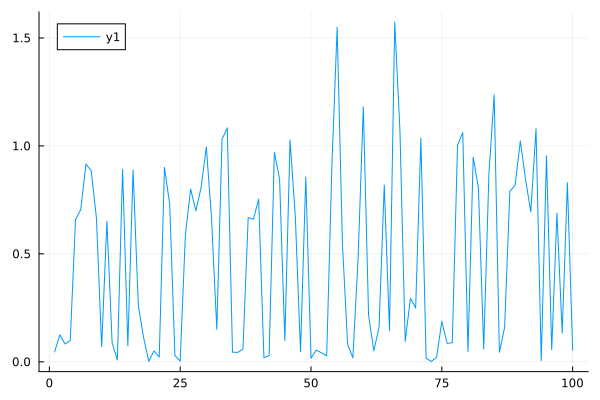

In [205]:
function SIReb(S0,I0,tf,γ,β,nn,NN)
    
    
    Δt=(tf)/nn
    ts=zeros(nn)
    Ts=zeros(NN,nn)
    tiempos=zeros(NN)
    #n=length(ts)
    ################
    SS=zeros(NN,nn)
    II=zeros(NN,nn)
    RR=zeros(NN,nn)
    S=zeros(nn);
    S[1]=S0
    I=zeros(nn);
    I[1]=I0
    N=S[1]+I[1]
    R=zeros(nn);
    
    function PSI(II,Δt)
         return (β*II*Δt/N)
    end
    function PIR(II,Δt)
        γ*Δt
    end
    
    
    
    for j in 1:NN
        i=1
        result = @timed begin
        while ts[i]<tf
            dt=Δt#rand(Exponential(1/i));
            ts[i+1]=ts[i]+dt
            if S[i]<=0
                SI=Binomiali(Int(1),PSI(I[i],dt),1)[end]
            else
                SI=Binomiali(Int(S[i]),PSI(I[i],dt),1)[end] 
            end
            S[i+1]=S[i]-SI
            IR=Binomiali(Int(I[i]),PIR(I[i],dt),1)[end]
    
            I[i+1]=I[i]+SI-IR
            #println(IR)
            #println(SI)
            R[i+1]=R[i]+IR
            i+=1
            if i==nn || I[i]==0 #ts[i+1]>=tf
                #println("Finalizado")
                break
            end
            end
        end
        SS[j,:]=S'
        II[j,:]=I'
        RR[j,:]=R'
        Ts[j,:]=ts'
        tiempos[j]=result.time
    end
    repeat(range(0,10,100)',2)
    return SS,II,RR,Ts,tiempos#SS,II,RR
end

SIReb (generic function with 1 method)

In [104]:
S[i]

-3.0

2×100 Matrix{Float64}:
 0.0  0.10101  0.20202  0.30303  0.40404  …  9.69697  9.79798  9.89899  10.0
 0.0  0.10101  0.20202  0.30303  0.40404     9.69697  9.79798  9.89899  10.0

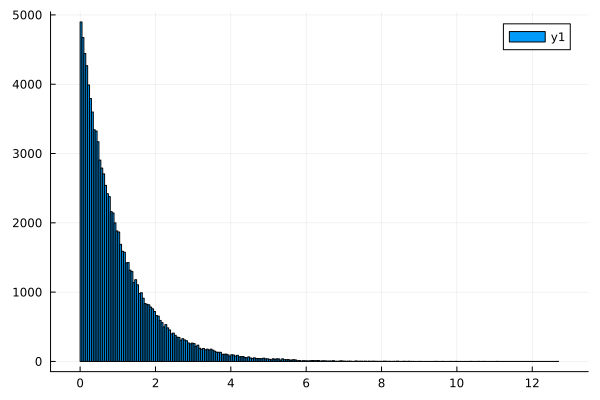

In [90]:
λ=1### Numero eventos tiempo t
dta=rand(Exponential(1/λ),100000);
histogram(dta)

In [8]:
i=1
rand(Exponential(1/i),1)

1-element Vector{Float64}:
 0.3507367231246689